In [1]:
#!/usr/bin/env python3

import tables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#!pwd

In [3]:
def get_merit_number(muon_energy, angular_error, radius = 600, nevents=100000):
    """
    muon_energy: as np.array
    muon_energy: as np.array
    
    return: a single float value
    """
    cylinder_area = np.pi*radius**2
    val = np.sum(1/(angular_error)**2 * ((muon_energy**(-2)*cylinder_area)/(muon_energy**(-1)*nevents)))
    merit_val = val**(1/2)
    return merit_val

# nevents is constant, will scale up and down.
# weighting term
# to do: plot for same bins avg angular error, normalize weighting 
# forget about area and nevents, have sum of ang error * energy weight / sum(energy weight)
# weight = muon energy ^-2/muon energy^-1
# this is sum angular error
# same two plots without energy weighting
# angular error sum / angular error ^2 sum square root 

In [4]:
def revised_merit1(muon_energy, angular_error):
    """
    muon_energy: as np.array
    muon_energy: as np.array

    return: a single float value
    """
    val = np.sum(1/(angular_error**2)*muon_energy**(-2)/muon_energy**(-1))
    merit_val = val**(1/2)
    return merit_val

In [5]:
def revised_no_weight(angular_error):
    val = np.sum(angular_error)/np.sum(angular_error)**2
    merit_val = val**(1/2)
    return merit_val

In [6]:
def merit_numerator_noE(angular_error, radius = 600):
    """
    returns the numerator of the merit value formula without taking energy into account for testing purposes
    return: a single float value
    """
    cylinder_area = np.pi*radius**2
    val = (np.sum((1/angular_error)**2 * cylinder_area))**(1/2)
    return val
# possibly area vs non area
# split up resolution vs non-area resolution?
# still need to apply weighting in only angular res
# 

In [7]:
def merit_denominator_noE(angular_error, nevents = 100000):
    """
    returns the denominator of the merit value formula without taking energy into account for testing purposes
    return: a single float
    """
    val = (np.sum((1/angular_error)**2/nevents))**(1/2)
    return val

In [8]:
def merit_numerator_E(angular_error, muon_energy, radius = 600):
    """
    
    """
    cylinder_area = np.pi*radius**2
    val = (np.sum((1/angular_error)**2 * muon_energy**(-2)*cylinder_area))**(1/2)
    return val

In [9]:
def merit_denominator_E(angular_error, muon_energy, nevents = 100000):
    """
    
    """
    val = (np.sum((1/angular_error)**2/(muon_energy**(-1)*nevents)))**(1/2)
    return val

In [10]:
def with_AreaKey(angular_error, Effective_area):
    val = (np.sum(Effective_area/4*np.pi*angular_error**2))**(1/2)
    return val

In [11]:
def binned_histogram_Areakey(xdata, error, bins=11, quant=68, logspace=True):
    """
    input: xdata and the corresponding percentage error. as np.array
    return: return the bin centers, mean and std of in each bin.
    bins : Number of bins. Shoud be an interger not a list. or array.
    """
    if logspace:
        bins = np.logspace(np.log10(np.min(xdata)), np.log10(np.max(xdata)), bins)
    else:
        bins = np.linspace(np.min(xdata), np.max(xdata), bins)
    
    centers = (bins[1:] + bins[:-1]) / 2.0
    lower = centers - bins[:-1]
    upper = bins[1:] - centers
    
    merit_numbers = []
    
    for lower, upper in zip(bins[:-1], bins[1:]):
        cut = (xdata >= lower) & (xdata < upper)
        
        error_distribution = error[cut]
        energy_distribtun = xdata[cut]
        
        merit_number = with_AreaKey(error_distribution, energy_distribtun)
        
        merit_numbers.append(merit_number)
    return (
        centers,
        np.array(merit_numbers)
    )

In [12]:
def binned_histogram(xdata, error, bins=11, quant=68, logspace=True):
    """
    input: xdata and the corresponding percentage error. as np.array
    return: return the bin centers, mean and std of in each bin.
    bins : Number of bins. Shoud be an interger not a list. or array.
    """
    if logspace:
        bins = np.logspace(np.log10(np.min(xdata)), np.log10(np.max(xdata)), bins)
    else:
        bins = np.linspace(np.min(xdata), np.max(xdata), bins)
    
    centers = (bins[1:] + bins[:-1]) / 2.0
    
    
    merit_numbers = []
    
    for lower, upper in zip(bins[:-1], bins[1:]):
        cut = (xdata >= lower) & (xdata < upper)
        
        error_distribution = error[cut]
        energy_distribtun = xdata[cut]
        
        merit_number = get_merit_number(energy_distribtun, error_distribution, radius = 600)
        
        merit_numbers.append(merit_number)
    return (
        centers,
        np.array(merit_numbers)
    )

In [13]:
def binned_histogram_numerator_noE(xdata, error, bins=11, quant=68, logspace=True):
    """
    input: xdata and the corresponding percentage error. as np.array
    return: return the bin centers, mean and std of in each bin.
    bins : Number of bins. Shoud be an interger not a list. or array.
    """
    if logspace:
        bins = np.logspace(np.log10(np.min(xdata)), np.log10(np.max(xdata)), bins)
    else:
        bins = np.linspace(np.min(xdata), np.max(xdata), bins)
    
    centers = (bins[1:] + bins[:-1]) / 2.0
    lower = centers - bins[:-1]
    upper = bins[1:] - centers
    
    merit_numbers = []
    
    for lower, upper in zip(bins[:-1], bins[1:]):
        cut = (xdata >= lower) & (xdata < upper)
        
        error_distribution = error[cut]
        energy_distribtun = xdata[cut]
        
        merit_number = merit_numerator_E(error_distribution, energy_distribtun)
        
        merit_numbers.append(merit_number)
    return (
        centers,
        np.array(merit_numbers)
    )

In [14]:
def binned_histogram_denominator_noE(xdata, error, bins=11, quant=68, logspace=True):
    """
    input: xdata and the corresponding percentage error. as np.array
    return: return the bin centers, mean and std of in each bin.
    bins : Number of bins. Shoud be an interger not a list. or array.
    """
    if logspace:
        bins = np.logspace(np.log10(np.min(xdata)), np.log10(np.max(xdata)), bins)
    else:
        bins = np.linspace(np.min(xdata), np.max(xdata), bins)
    
    centers = (bins[1:] + bins[:-1]) / 2.0
    lower = centers - bins[:-1]
    upper = bins[1:] - centers
    
    merit_numbers = []
    
    for lower, upper in zip(bins[:-1], bins[1:]):
        cut = (xdata >= lower) & (xdata < upper)
        
        error_distribution = error[cut]
        energy_distribtun = xdata[cut]
        
        merit_number = merit_denominator_noE(error_distribution)
        
        merit_numbers.append(merit_number)
    return (
        centers,
        np.array(merit_numbers)
    )

In [15]:
def binned_histogram_numerator_E(xdata, error, bins=11, quant=68, logspace=True):
    """
    input: xdata and the corresponding percentage error. as np.array
    return: return the bin centers, mean and std of in each bin.
    bins : Number of bins. Shoud be an interger not a list. or array.
    """
    if logspace:
        bins = np.logspace(np.log10(np.min(xdata)), np.log10(np.max(xdata)), bins)
    else:
        bins = np.linspace(np.min(xdata), np.max(xdata), bins)
    
    centers = (bins[1:] + bins[:-1]) / 2.0
    lower = centers - bins[:-1]
    upper = bins[1:] - centers
    
    merit_numbers = []
    
    for lower, upper in zip(bins[:-1], bins[1:]):
        cut = (xdata >= lower) & (xdata < upper)
        
        error_distribution = error[cut]
        energy_distribtun = xdata[cut]
        
        merit_number = merit_numerator_noE(error_distribution)
        
        merit_numbers.append(merit_number)
    return (
        centers,
        np.array(merit_numbers)
    )

In [16]:
def binned_histogram_denominator_E(xdata, error, bins=11, quant=68, logspace=True):
    """
    input: xdata and the corresponding percentage error. as np.array
    return: return the bin centers, mean and std of in each bin.
    bins : Number of bins. Shoud be an interger not a list. or array.
    """
    if logspace:
        bins = np.logspace(np.log10(np.min(xdata)), np.log10(np.max(xdata)), bins)
    else:
        bins = np.linspace(np.min(xdata), np.max(xdata), bins)
    
    centers = (bins[1:] + bins[:-1]) / 2.0
    lower = centers - bins[:-1]
    upper = bins[1:] - centers
    
    merit_numbers = []
    
    for lower, upper in zip(bins[:-1], bins[1:]):
        cut = (xdata >= lower) & (xdata < upper)
        
        error_distribution = error[cut]
        energy_distribtun = xdata[cut]
        
        merit_number = merit_denominator_E(error_distribution, energy_distribtun)
        
        merit_numbers.append(merit_number)
    return (
        centers,
        np.array(merit_numbers)
    )

In [17]:
# code from Hans

def zenith_to_dec(zenith):
    dec = -1.*(np.pi/2. - zenith)
    return dec

def GreatCircleDistance(ra_1, dec_1, ra_2, dec_2):
    #Compute the great circle distance between two events#
    #All coordinates must be given in radians#
    delta_dec = np.abs(dec_1 - dec_2)
    delta_ra = np.abs(ra_1 - ra_2)
    x = (np.sin(delta_dec / 2.))**2. + np.cos(dec_1) *\
        np.cos(dec_2) * (np.sin(delta_ra / 2.))**2.
    return 2. * np.arcsin(np.sqrt(x))

## Data preprocessing

In [18]:
# slashes have to be backwards in path
#f = tables.open_file("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_sim0002_waterfits_EffectiveArea.hdf5")
#f.root

In [19]:
# slashes have to be backwards in path
f = tables.open_file("single_muons_muongun_reco_spline_sim0002_waterfits_EffectiveArea.hdf5")
f.root

/ (RootGroup) ''
  children := ['__I3Index__' (Group), 'MuonEffectiveArea' (Table), 'angular_error_LLHFit_mmsreco' (Table), 'angular_error_LLHFit_step1' (Table), 'angular_error_LLHFit_step2' (Table), 'angular_error_LLHFit_step3' (Table), 'angular_error_LLHFit_step4' (Table), 'angular_error_linefit' (Table), 'event_id' (Table), 'logl_mmsreco' (Table), 'logl_splines_05ns' (Table), 'logl_splines_10ns' (Table), 'logl_splines_20ns' (Table), 'logl_splines_35ns' (Table), 'muon_energy' (Table), 'nchannels_count' (Table), 'nhits_clean' (Table), 'nhits_unclean' (Table), 'qtotal_clean' (Table), 'qtotal_unclean' (Table), 'track_length' (Table), 'zenith_angle' (Table)]

In [20]:
#zenith_true = f.root.MCMuon.col("zenith")
#azimuth_true = f.root.MCMuon.col("azimuth")
#dec_true = zenith_to_dec(zenith_true)

In [21]:

#zenith_reco = f.root.LLHFit_mmsreco.col("zenith")
#azimuth_reco = f.root.LLHFit_mmsreco.col("azimuth")
#dec_reco = zenith_to_dec(zenith_reco)

In [22]:
#dpsi = GreatCircleDistance(azimuth_true, dec_true, azimuth_reco, dec_reco)
#print(np.rad2deg(np.percentile(dpsi[np.isfinite(dpsi)], [10, 50, 90])))

In [23]:
data_dict = {
    #'event_id': file.root.event_id.cols.value[:],

    #'angular_error_linefit' : np.degrees(file.root.angular_error_linefit.cols.value[:]),
    'angular_error_mmsreco': np.degrees(f.root.angular_error_LLHFit_mmsreco.cols.value[:]),
    #'angular_error_splines_35ns': np.degrees(file.root.angular_error_LLHFit_step1.cols.value[:]),
    #'angular_error_splines_20ns': np.degrees(file.root.angular_error_LLHFit_step2.cols.value[:]),
    #'angular_error_splines_10ns': np.degrees(file.root.angular_error_LLHFit_step3.cols.value[:]),
    #'angular_error_splines_05ns': np.degrees(file.root.angular_error_LLHFit_step4.cols.value[:]),

    #'logl_splines_35ns': file.root.logl_splines_35ns.cols.value[:],
    #'logl_splines_20ns': file.root.logl_splines_20ns.cols.value[:],
    #'logl_splines_10ns': file.root.logl_splines_10ns.cols.value[:],
    #'logl_splines_05ns': file.root.logl_splines_05ns.cols.value[:],
    #'logl_mmsreco': file.root.logl_mmsreco.cols.value[:],
    #'logl_mctruth': file.root.logl_mctruth.cols.value[:],
    #'nchannels_count': file.root.nchannels_count.cols.value[:],
    #'qtotal_clean': file.root.qtotal_clean.cols.value[:],
    #'qtotal_unclean': file.root.qtotal_unclean.cols.value[:],
    #'nhits_clean': file.root.nhits_clean.cols.value[:],
    #'nhits_unclean': file.root.nhits_unclean.cols.value[:],
    #'zenith_angle': np.degrees(file.root.zenith_angle.cols.value[:]),
    #'numu_energy': file.root.numu_energy.cols.value[:],
    'MuonEffectiveArea': f.root.MuonEffectiveArea.cols.value[:],
    'muon_energy': f.root.muon_energy.cols.value[:],
    'dirTrackLengthA_reco': f.root.track_length.cols.value[:]
}

In [24]:
df = pd.DataFrame(data_dict)
df

,angular_error_mmsreco,MuonEffectiveArea,muon_energy,dirTrackLengthA_reco
0,0.135597,9.734735e+10,82413.121514,257.512445
1,34.695274,6.004455e+10,50449.818443,135.333762
2,11.100694,2.364044e+11,201565.655862,NaN
3,2.103542,7.693895e+10,64925.967136,238.682905
4,35.217937,8.055803e+09,5902.700981,177.183219
...,...,...,...,...
58981,0.009737,2.236337e+11,190622.926582,1087.936516
58982,19.961458,3.639989e+10,30189.636449,93.787862
58983,0.050392,1.403944e+11,119298.453314,159.376226
58984,0.021210,1.562260e+11,132863.936810,643.433948


In [25]:
# checking for NaN values
print(df.isnull().sum())

angular_error_mmsreco    1811
MuonEffectiveArea           0
muon_energy                 0
dirTrackLengthA_reco     6922
dtype: int64


In [26]:
df = df.dropna()
df

,angular_error_mmsreco,MuonEffectiveArea,muon_energy,dirTrackLengthA_reco
0,0.135597,9.734735e+10,82413.121514,257.512445
1,34.695274,6.004455e+10,50449.818443,135.333762
3,2.103542,7.693895e+10,64925.967136,238.682905
4,35.217937,8.055803e+09,5902.700981,177.183219
5,0.009549,9.633965e+11,824496.665193,938.181358
...,...,...,...,...
58981,0.009737,2.236337e+11,190622.926582,1087.936516
58982,19.961458,3.639989e+10,30189.636449,93.787862
58983,0.050392,1.403944e+11,119298.453314,159.376226
58984,0.021210,1.562260e+11,132863.936810,643.433948


In [27]:
get_merit_number(df.muon_energy, df.angular_error_mmsreco)

123.85848056809039

In [28]:
log_bin, merit_number = binned_histogram(xdata = df.muon_energy,
                                         error=df.angular_error_mmsreco, 
                                         bins=11, 
                                         quant=68,
                                         logspace=True)

In [29]:
log_bin1, merit_number1 = binned_histogram_numerator_noE(xdata = df.muon_energy,
                                         error=df.angular_error_mmsreco, 
                                         bins=11, 
                                         quant=68,
                                         logspace=True)

In [30]:
log_bin2, merit_number2 = binned_histogram_denominator_noE(xdata = df.muon_energy,
                                         error=df.angular_error_mmsreco, 
                                         bins=11, 
                                         quant=68,
                                         logspace=True)

In [31]:
log_bin3, merit_number3 = binned_histogram_numerator_E(xdata = df.muon_energy,
                                         error=df.angular_error_mmsreco, 
                                         bins=11, 
                                         quant=68,
                                         logspace=True)

In [32]:
log_bin4, merit_number4 = binned_histogram_denominator_E(xdata = df.muon_energy,
                                         error=df.angular_error_mmsreco, 
                                         bins=11, 
                                         quant=68,
                                         logspace=True)

In [33]:
len(log_bin)

10

In [34]:
len(merit_number)

10

In [35]:
def with_AreaKey(angular_error, Effective_area):
    val = (np.sum(Effective_area/(4*np.pi*angular_error**2))**(1/2))
    return val

In [36]:
def binned_histogram_Areakey(xdata, Eff_A, error, bins=11, quant=68, logspace=True):
    """
    input: xdata and the corresponding percentage error. as np.array
    return: return the bin centers, mean and std of in each bin.
    bins : Number of bins. Shoud be an interger not a list. or array.
    """
    if logspace:
        bins = np.logspace(np.log10(np.min(xdata)), np.log10(np.max(xdata)), bins)
    else:
        bins = np.linspace(np.min(xdata), np.max(xdata), bins)
    
    centers = (bins[1:] + bins[:-1]) / 2.0
    lower = centers - bins[:-1]
    upper = bins[1:] - centers
    
    merit_numbers = []
    
    for lower, upper in zip(bins[:-1], bins[1:]):
        cut = (xdata >= lower) & (xdata < upper)
        
        error_distribution = error[cut]
        energy_distribution = xdata[cut]
        
        
        merit_number = with_AreaKey(error_distribution, Eff_A)
        
        merit_numbers.append(merit_number)
    return (
        centers,
        np.array(merit_numbers)
    )

In [37]:
log_bin, merit_number = binned_histogram_Areakey(xdata = df.muon_energy,
                                            Eff_A = df.MuonEffectiveArea,
                                         error=df.angular_error_mmsreco, 
                                         bins=11, 
                                         quant=68,
                                         logspace=True)
print(merit_number)

[5.33664105e+04 4.60517346e+05 2.00694816e+06 7.07523445e+06
 1.82009644e+07 6.73027370e+07 1.41980998e+08 7.24323674e+08
 4.15026776e+08 8.47909245e+08]


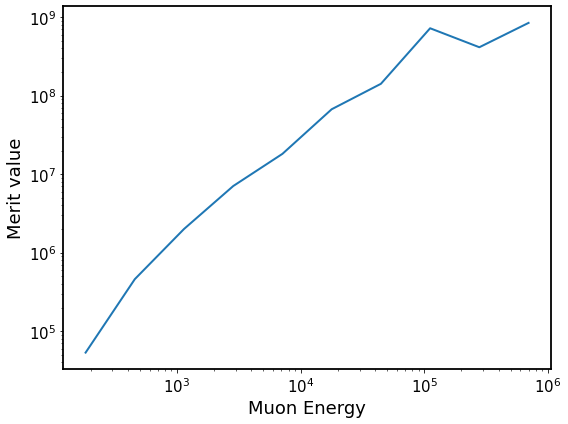

In [38]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(log_bin, merit_number, lw=2)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.8)
    ax.spines[axis].set_color('0.0')
    ax.spines[axis].set_linewidth(1.8)
    ax.spines[axis].set_color('0.0')

ax.set_xlabel("Muon Energy", fontsize=18)
ax.set_ylabel("Merit value", fontsize=18)
    
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

ax.set_xscale('log')
ax.set_yscale('log')
plt.tight_layout()
plt.show()

What is effective area part, should know how individual parts of product look

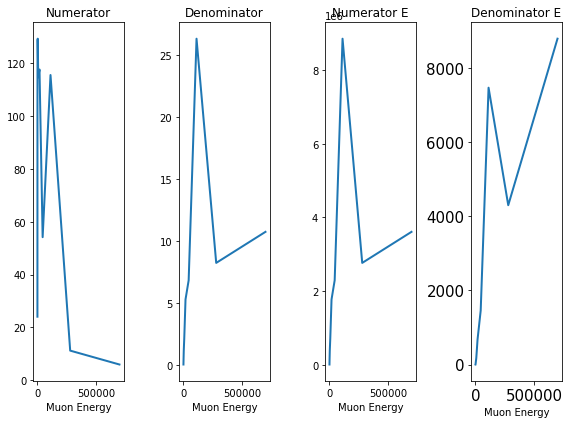

In [39]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8, 6))

ax1.plot(log_bin1, merit_number1, lw=2)
ax2.plot(log_bin2, merit_number2, lw=2)
ax3.plot(log_bin3, merit_number3, lw=2)
ax4.plot(log_bin4, merit_number4, lw=2)


for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.8)
    ax.spines[axis].set_color('0.0')
    ax.spines[axis].set_linewidth(1.8)
    ax.spines[axis].set_color('0.0')

ax1.set_xlabel("Muon Energy")
#ax1.set_ylabel("Merit value")
ax2.set_xlabel("Muon Energy")
#ax2.set_ylabel("Merit value")
ax3.set_xlabel("Muon Energy")
#ax3.set_ylabel("Merit value")
ax4.set_xlabel("Muon Energy")
#ax4.set_ylabel("Merit value")

ax1.set_title('Numerator')
ax2.set_title('Denominator')
ax3.set_title('Numerator E')
ax4.set_title('Denominator E')
    
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

ax.set_xscale('log')
plt.tight_layout()
plt.show()

* Trigger could be causing weirdness, need ratio of simulated events to recorded events. May not know injected events?
simulated events should be input, trigger could be losing events due to low energy. I know how much should be there
* Nevents - look at per file, need number of files.

## Plotting per track length

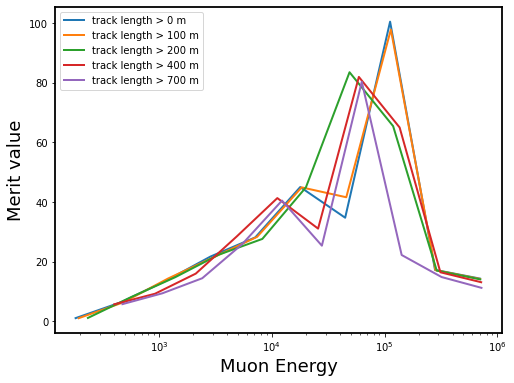

In [40]:
fig, ax = plt.subplots(figsize=(8,6))

for LDir in [0, 100, 200, 400, 700]:
    data = df.loc[(df['dirTrackLengthA_reco'] > LDir)]
    muon_energy = data.muon_energy
    
    angular_error_mmsreco = data.angular_error_mmsreco
    
    log_bin, merit_number = binned_histogram(xdata = muon_energy,
                                         error = angular_error_mmsreco, 
                                         bins = 11, 
                                         quant = 68,
                                         logspace = True)

    ax.plot(log_bin, merit_number, label = f'track length > {LDir} m', lw=2)
    
    ax.set_xlabel("Muon Energy", fontsize=18)
    ax.set_ylabel("Merit value", fontsize=18)
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.8)
        ax.spines[axis].set_color('0.0')
        ax.spines[axis].set_linewidth(1.8)
        ax.spines[axis].set_color('0.0')
    
    ax.set_xscale('log')
    ax.legend()
plt.show()